Name: Sricharan Koride
ID: 2343517466
Github id: sricharan-koride

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
data = pd.read_csv('../data/aps_failure_training_set.csv', header=0, low_memory=False, na_values="na")
print(data)

      class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0 

# 1(b)(i)Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [5]:
target = data['class']
features = data.drop(columns=['class'])


target = target.map({'pos': 1, 'neg': 0})


imputer = KNNImputer(n_neighbors=5)
features_imputed = imputer.fit_transform(features)

data_imputed = pd.DataFrame(features_imputed, columns=features.columns)
data_imputed['class'] = target.reset_index(drop=True)
data = data_imputed.copy()
del data_imputed
print(data)

         aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0       76698.0     0.8  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1       33058.0     0.4  0.000000e+00   312.8     0.0     0.0     0.0     0.0   
2       41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3          12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4       60874.0     0.4  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
...         ...     ...           ...     ...     ...     ...     ...     ...   
59995  153002.0     1.2  6.640000e+02   186.0     0.0     0.0     0.0     0.0   
59996    2286.0     0.8  2.130707e+09   224.0     0.0     0.0     0.0     0.0   
59997     112.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0     0.0   
59998   80292.0     0.8  2.130706e+09   494.0     0.0     0.0     0.0     0.0   
59999   40222.0     0.8  6.980000e+02   628.0     0.0     0.0     0.0     0.0   

       ag_002  ag_003  ... 

# There are many data imputation techniques like dropping records with missing values, replacing with mean/meidan, kNN imputer etc. I chose Simple Imputation with KNN value even though it is computationally more intensive as opposed to mean as it is better suited for complex datasets.

# 1(b)(ii) For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean

In [8]:
X_train = data.drop(columns=['class'])  
y_train = data['class']  
means = X_train.mean()
std_devs = X_train.std()
cv = std_devs / means
print(cv)

aa_000      2.450938
ab_000      3.243598
ac_000      2.086516
ad_000    244.190150
ae_000     22.661238
             ...    
ee_007      4.979575
ee_008      3.242233
ee_009      5.663503
ef_000     46.227633
eg_000     39.593750
Length: 170, dtype: float64


# 1(b)(iii) Plot a correlation matrix for your features using pandas or any other tool

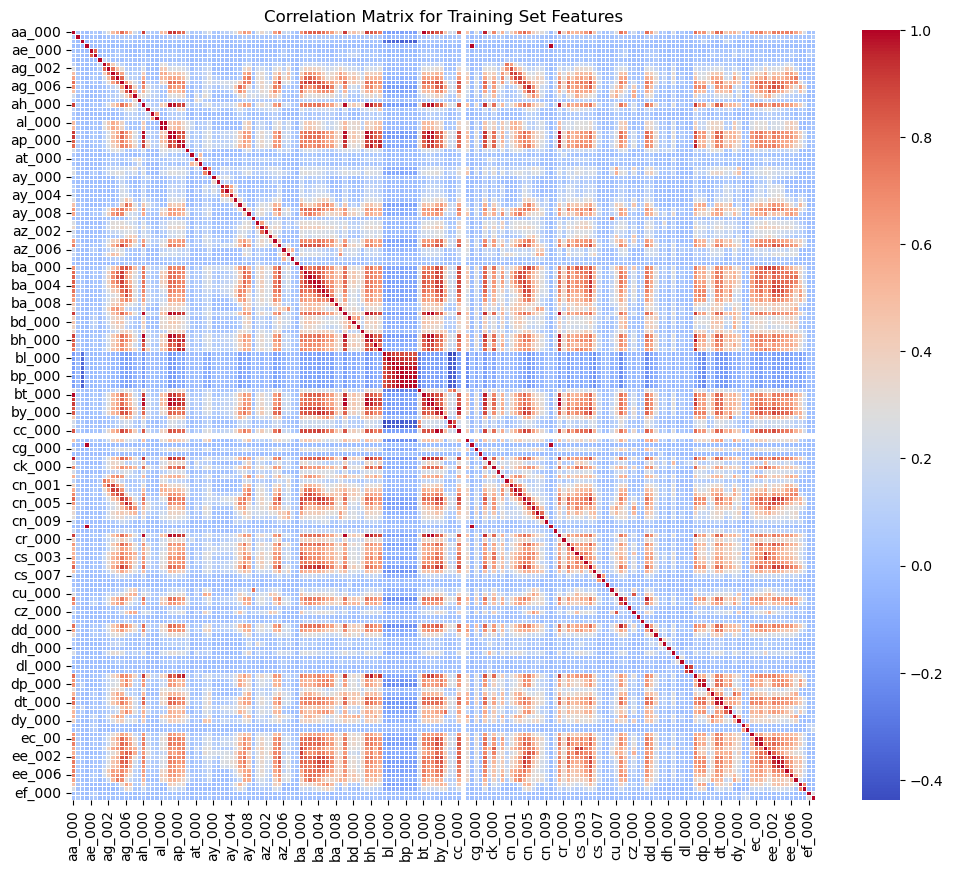

In [10]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Training Set Features')
plt.show()

# 1(b)(iv) Pick √170 features with highest CV ,and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

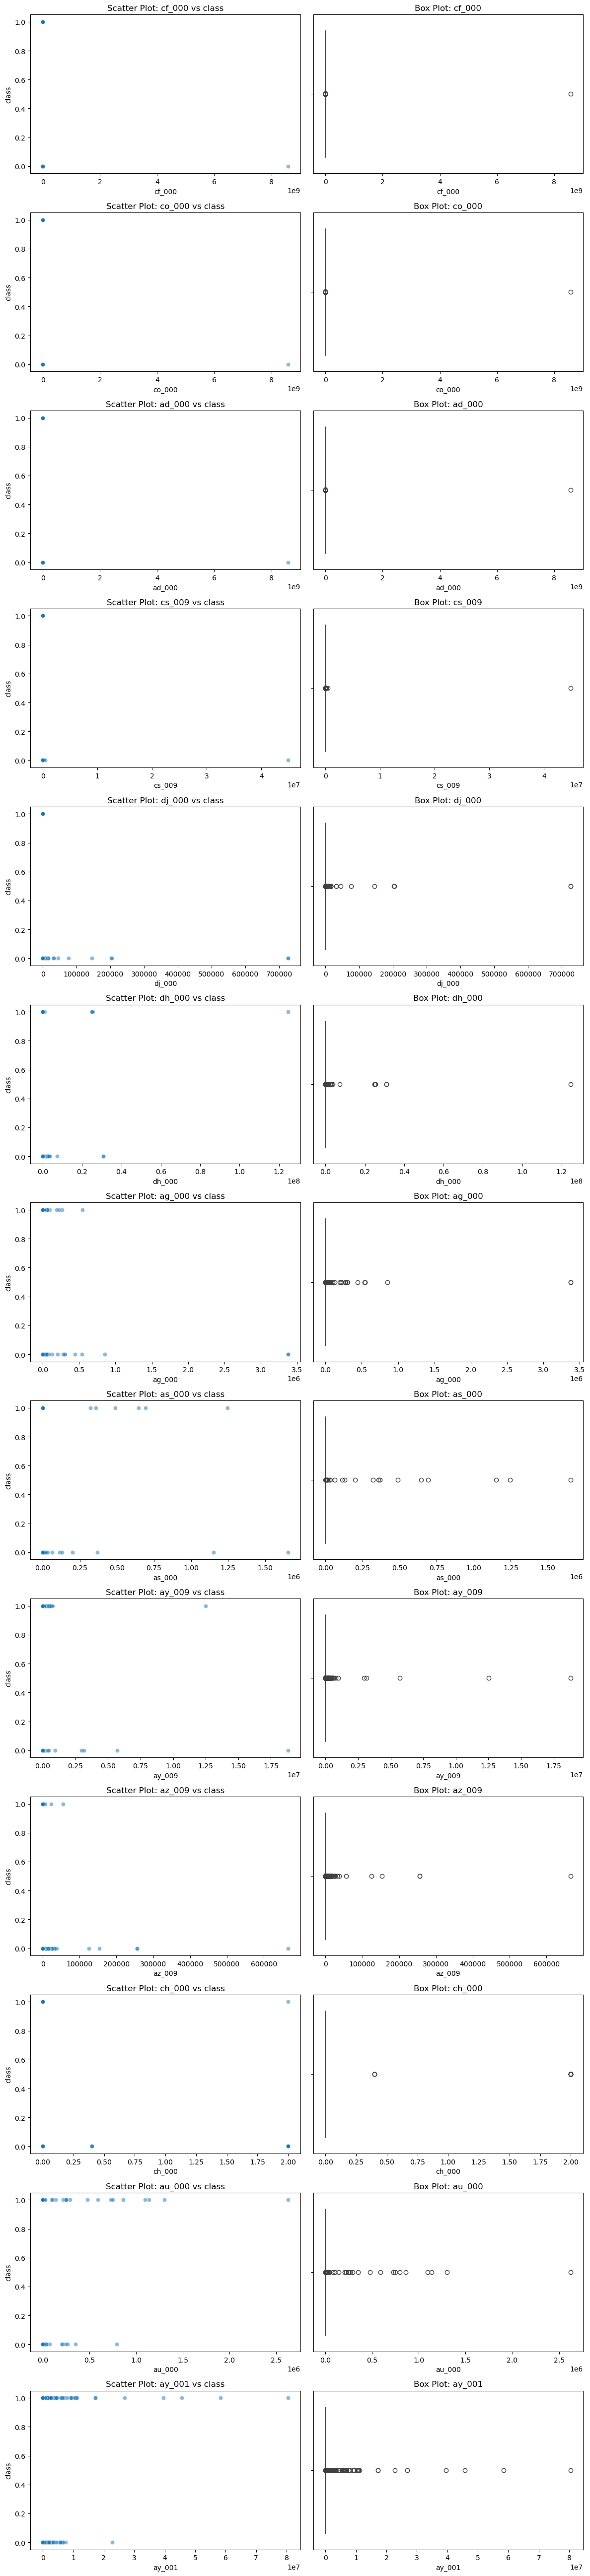

In [12]:
top_features = cv.nlargest(int(np.floor(np.sqrt(170)))).index
n_rows = int(np.floor(np.sqrt(170)))
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))  


for i, feature in enumerate(top_features):
 
    sns.scatterplot(x=X_train[feature], y=y_train, ax=axes[i, 0], alpha=0.5)
    axes[i, 0].set_title(f'Scatter Plot: {feature} vs class')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('class')
    
    sns.boxplot(x=X_train[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot: {feature}')
    axes[i, 1].set_xlabel(feature)


plt.tight_layout()
plt.show()

# 1(b)(v) Determine the number of positive and negative data. Is this data set imbalanced?

In [14]:
class_counts = data['class'].value_counts()
print(class_counts)
class_proportion = y_train.value_counts(normalize=True) * 100
print("Class proportions (%):\n", class_proportion)


class
0    59000
1     1000
Name: count, dtype: int64
Class proportions (%):
 class
0    98.333333
1     1.666667
Name: proportion, dtype: float64


# as we can see the negative class is dominating the dataset and represents 98.3% of all values, so yes the data is very imbalanced as positive class is heavily underrepresented

# 1(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forest and compare it to the test error

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [18]:
test_data = pd.read_csv('../data/aps_failure_test_set.csv', header=0, low_memory=False, na_values="na")
target = test_data['class']
features = test_data.drop(columns=['class'])
target = target.map({'pos': 1, 'neg': 0})
imputer = KNNImputer(n_neighbors=5)
features_imputed = imputer.fit_transform(features)
data_imputed = pd.DataFrame(features_imputed, columns=features.columns)
data_imputed['class'] = target.reset_index(drop=True)
test_data = data_imputed.copy()
del data_imputed
print(test_data)
X_test = test_data.drop(columns=['class'])  
y_test = test_data['class']

        aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0         60.0     0.0  2.000000e+01    12.0     0.0     0.0     0.0     0.0   
1         82.0     0.0  6.800000e+01    40.0     0.0     0.0     0.0     0.0   
2      66002.0     2.0  2.120000e+02   112.0     0.0     0.0     0.0     0.0   
3      59816.0     0.0  1.010000e+03   936.0     0.0     0.0     0.0     0.0   
4       1814.0     0.4  1.560000e+02   140.0     0.0     0.0     0.0     0.0   
...        ...     ...           ...     ...     ...     ...     ...     ...   
15995  81852.0     0.8  2.130706e+09   892.0     0.0     0.0     0.0     0.0   
15996     18.0     0.0  5.200000e+01    46.0     8.0    26.0     0.0     0.0   
15997  79636.0     0.0  1.670000e+03  1518.0     0.0     0.0     0.0     0.0   
15998    110.0     1.6  3.600000e+01    32.0     0.0     0.0     0.0     0.0   
15999      8.0     0.0  6.000000e+00     4.0     2.0     2.0     0.0     0.0   

       ag_002    ag_003  ...    ee_003 

# imbalanced data - train AUC


Confusion Matrix for training set:
 [[59000     0]
 [    1   999]]
Misclassification Rate training set: 0.0000
AUC training set: 1.0000

Classification Report training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



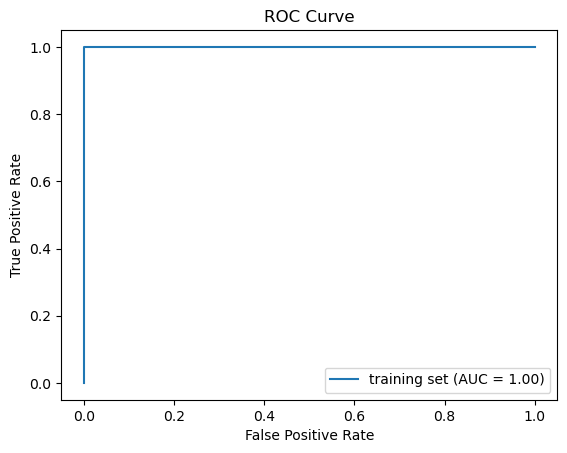

In [20]:
y_pred = rf_model.predict(X_train)
y_prob = rf_model.predict_proba(X_train)[:, 1]  
cm = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix for training set:\n", cm)

misclassification_rate = 1 - accuracy_score(y_train, y_pred)
print(f"Misclassification Rate training set: {misclassification_rate:.4f}")
fpr, tpr, thresholds = roc_curve(y_train, y_prob)

auc_score = roc_auc_score(y_train, y_prob)
print(f"AUC training set: {auc_score:.4f}")
 
plt.plot(fpr, tpr, label=f"training set (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

print(f"\nClassification Report training set:\n", classification_report(y_train, y_pred))

# imbalanced data - test AUC


Confusion Matrix for test set:
 [[15608    17]
 [  109   266]]
Misclassification Rate test set: 0.0079
AUC test set: 0.9926

Classification Report test set:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.97      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000

Out-of-Bag (OOB) Error: 0.006166666666666654
Test Error: 0.007874999999999965


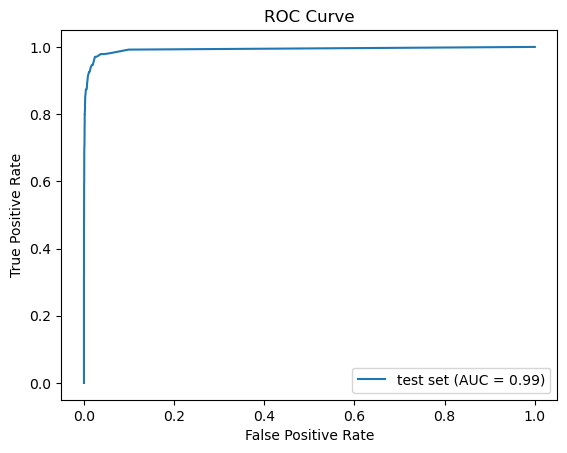

In [22]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for test set:\n", cm)

misclassification_rate = 1 - accuracy_score(y_test, y_pred)
print(f"Misclassification Rate test set: {misclassification_rate:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC test set: {auc_score:.4f}")
 
plt.plot(fpr, tpr, label=f"test set (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

print(f"\nClassification Report test set:\n", classification_report(y_test, y_pred))

oob_error = 1 - rf_model.oob_score_
print("Out-of-Bag (OOB) Error:", oob_error)

y_pred_test = rf_model.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred_test)
print("Test Error:", test_error)

# 1(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c

# balanced data - train AUC


Confusion Matrix for training set:
 [[59000     0]
 [    1   999]]
Misclassification Rate training set: 0.0000
AUC training set: 1.0000

Classification Report training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



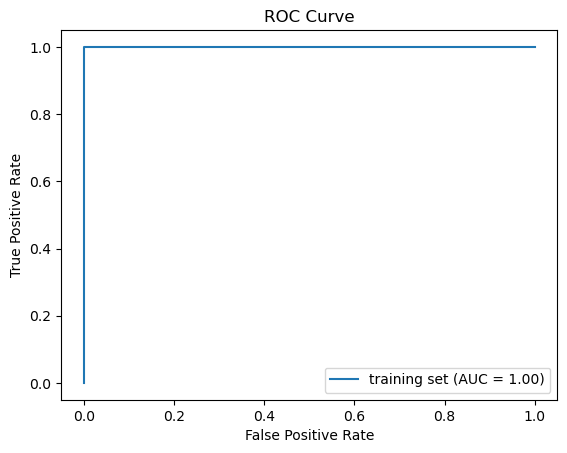

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True, class_weight = 'balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_train)
y_prob = rf_model.predict_proba(X_train)[:, 1]  
cm = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix for training set:\n", cm)

misclassification_rate = 1 - accuracy_score(y_train, y_pred)
print(f"Misclassification Rate training set: {misclassification_rate:.4f}")
fpr, tpr, thresholds = roc_curve(y_train, y_prob)

auc_score = roc_auc_score(y_train, y_prob)
print(f"AUC training set: {auc_score:.4f}")
 
plt.plot(fpr, tpr, label=f"training set (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

print(f"\nClassification Report training set:\n", classification_report(y_train, y_pred))

# balanced data - test AUC


Confusion Matrix for test set:
 [[15618     7]
 [  194   181]]
Misclassification Rate test set: 0.0126
AUC test set: 0.9925

Classification Report test set:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.96      0.48      0.64       375

    accuracy                           0.99     16000
   macro avg       0.98      0.74      0.82     16000
weighted avg       0.99      0.99      0.99     16000

Out-of-Bag (OOB) Error: 0.007883333333333353
Test Error: 0.012562500000000032


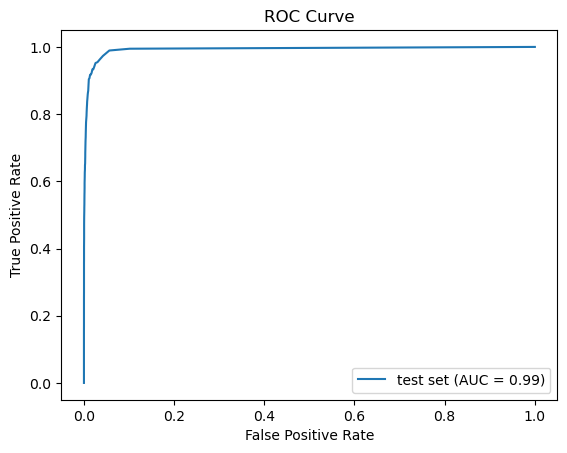

In [27]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for test set:\n", cm)

misclassification_rate = 1 - accuracy_score(y_test, y_pred)
print(f"Misclassification Rate test set: {misclassification_rate:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC test set: {auc_score:.4f}")
 
plt.plot(fpr, tpr, label=f"test set (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

print(f"\nClassification Report test set:\n", classification_report(y_test, y_pred))

oob_error = 1 - rf_model.oob_score_
print("Out-of-Bag (OOB) Error:", oob_error)

y_pred_test = rf_model.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred_test)
print("Test Error:", test_error)

# 1(e) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 1, 'learning_rate': 0.2, 'max_depth': 5}
Confusion Matrix (Training Set):
 [[59000     0]
 [    9   991]]
AUC (Training Set): 0.9999956101694916


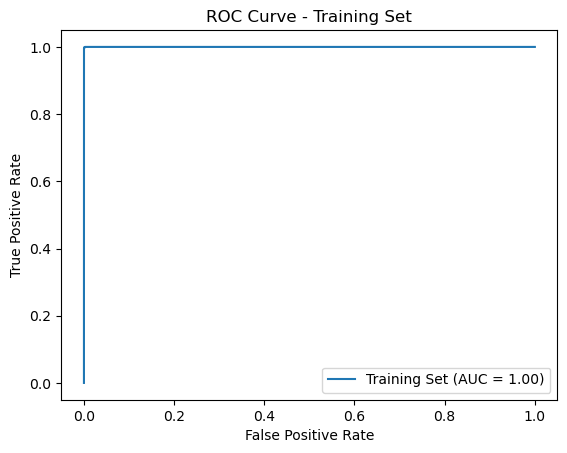

In [29]:
warnings.filterwarnings("ignore")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              n_estimators=100,
                              use_label_encoder=False,
                              eval_metric='logloss', verbosity=0)


param_grid = {
    'alpha': [0, 0.1, 1, 10],          
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7]            
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)


y_pred_train = best_xgb_model.predict(X_train)
y_prob_train = best_xgb_model.predict_proba(X_train)[:, 1]  


conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)


fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc_score_train = roc_auc_score(y_train, y_prob_train)
print("AUC (Training Set):", auc_score_train)


plt.plot(fpr_train, tpr_train, label=f"Training Set (AUC = {auc_score_train:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Training Set")
plt.legend(loc="lower right")
plt.show()

Confusion Matrix (Test Set):
 [[15607    18]
 [  103   272]]
AUC (Test Set): 0.994473472


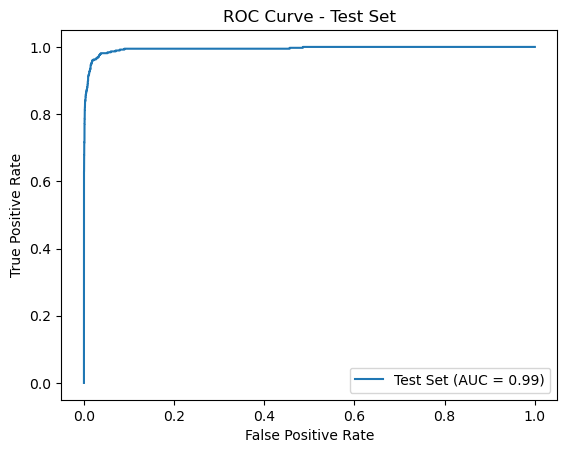

In [30]:
y_pred_test = best_xgb_model.predict(X_test)
y_prob_test = best_xgb_model.predict_proba(X_test)[:, 1]  


conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)


fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_score_test = roc_auc_score(y_test, y_prob_test)
print("AUC (Test Set):", auc_score_test)

plt.plot(fpr_test, tpr_test, label=f"Test Set (AUC = {auc_score_test:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set")
plt.legend(loc="lower right")
plt.show()

In [31]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

print("\nComparison of Cross-Validation AUC vs Test AUC:")
print(f"Cross-Validation AUC (Training Set, 5-Fold): {cv_scores.mean():.4f}")
print(f"Test AUC: {auc_score_test:.4f}")


Comparison of Cross-Validation AUC vs Test AUC:
Cross-Validation AUC (Training Set, 5-Fold): 0.9892
Test AUC: 0.9945


# 1(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters with SMOTE: {'xgb__alpha': 0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 7}

Training Error with SMOTE and Best Parameters: 0.0
Confusion Matrix (Training Set with SMOTE):
 [[59000     0]
 [    0  1000]]
AUC (Training Set with SMOTE): 1.0

Test Error with SMOTE and Best Parameters: 0.009375000000000022
Confusion Matrix (Test Set with SMOTE):
 [[15531    94]
 [   56   319]]
AUC (Test Set with SMOTE): 0.9936008533333334


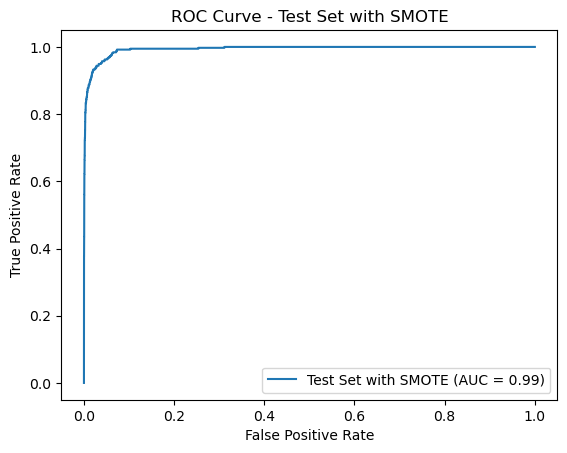

In [63]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              n_estimators=100,
                              use_label_encoder=False,
                              eval_metric='logloss', verbosity=0)

pipeline_smote = ImbPipeline(steps=[
    ('scaler', StandardScaler()),      
    ('smote', SMOTE(random_state=42)), 
    ('xgb', xgb_model)                 
])


param_grid = {
    'xgb__alpha': [0, 0.1, 1, 10],         
    'xgb__learning_rate': [0.01, 0.1, 0.2], 
    'xgb__max_depth': [3, 5, 7]           
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=pipeline_smote, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
cv_scores_smote = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_pipeline_smote = grid_search.best_estimator_
print("Best Parameters with SMOTE:", grid_search.best_params_)


y_pred_train_smote = best_pipeline_smote.predict(X_train)
y_prob_train_smote = best_pipeline_smote.predict_proba(X_train)[:, 1]
train_error_smote = 1 - accuracy_score(y_train, y_pred_train_smote)
print("\nTraining Error with SMOTE and Best Parameters:", train_error_smote)
print("Confusion Matrix (Training Set with SMOTE):\n", confusion_matrix(y_train, y_pred_train_smote))
print("AUC (Training Set with SMOTE):", roc_auc_score(y_train, y_prob_train_smote))


y_pred_test_smote = best_pipeline_smote.predict(X_test)
y_prob_test_smote = best_pipeline_smote.predict_proba(X_test)[:, 1]
test_error_smote = 1 - accuracy_score(y_test, y_pred_test_smote)
print("\nTest Error with SMOTE and Best Parameters:", test_error_smote)
print("Confusion Matrix (Test Set with SMOTE):\n", confusion_matrix(y_test, y_pred_test_smote))
print("AUC (Test Set with SMOTE):", roc_auc_score(y_test, y_prob_test_smote))


fpr_test_smote, tpr_test_smote, _ = roc_curve(y_test, y_prob_test_smote)
plt.plot(fpr_test_smote, tpr_test_smote, label=f"Test Set with SMOTE (AUC = {roc_auc_score(y_test, y_prob_test_smote):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set with SMOTE")
plt.legend(loc="lower right")
plt.show()

In [65]:
print("\n--- Comparison of SMOTE vs Non-SMOTE ---")
print("Cross-Validation AUC with SMOTE (5-Fold):", cv_scores_smote.mean())
print("Cross-Validation AUC without SMOTE (5-Fold):", cv_scores.mean())

print("\nTest Error with SMOTE:", test_error_smote)
print("Test Error without SMOTE:", test_error)
print("\nAUC on Test Set with SMOTE:", roc_auc_score(y_test, y_prob_test_smote))
print("AUC on Test Set without SMOTE:", roc_auc_score(y_test, y_prob_test))


--- Comparison of SMOTE vs Non-SMOTE ---
Cross-Validation AUC with SMOTE (5-Fold): 0.9892312711864406
Cross-Validation AUC without SMOTE (5-Fold): 0.9892312711864406

Test Error with SMOTE: 0.009375000000000022
Test Error without SMOTE: 0.012562500000000032

AUC on Test Set with SMOTE: 0.9936008533333334
AUC on Test Set without SMOTE: 0.994473472


# ISLR 9.7.3

# a) Sketch the observations

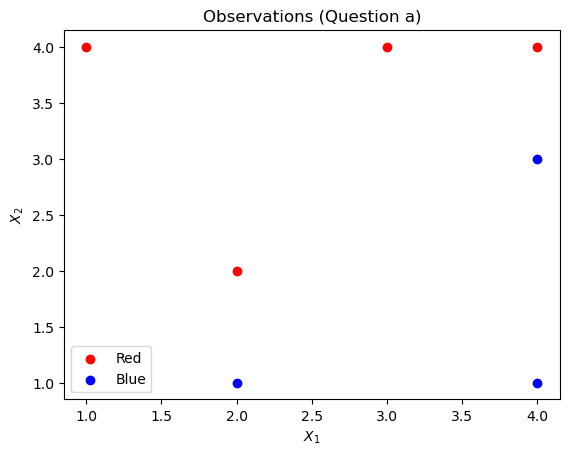

In [40]:


# Data points
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
y = np.array([1, 1, 1, 1, 0, 0, 0])  
# Plot data points
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Red')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Blue')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title("Observations (Question a)")
plt.legend()
plt.show()


# b) Sketch the optimal separating hyperplane

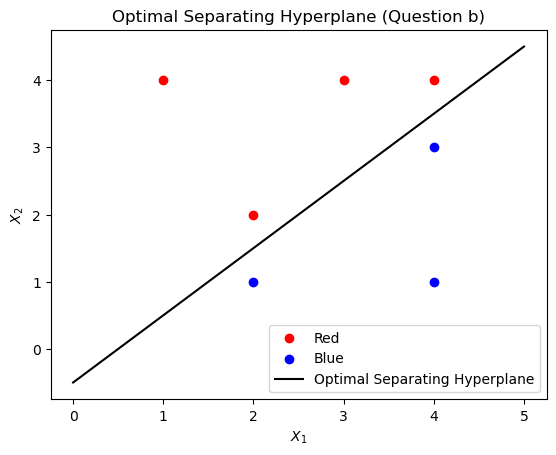

In [44]:
svc = SVC(kernel='linear', C=1e10)  
svc.fit(X, y)


w = svc.coef_[0]
slope = -w[0] / w[1]
intercept = -svc.intercept_[0] / w[1]


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = slope * xx + intercept


plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Red')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Blue')
plt.plot(xx, yy, 'k-', label='Optimal Separating Hyperplane')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title("Optimal Separating Hyperplane (Question b)")
plt.legend()
plt.show()

# c) Classification Rule for the Maximal Margin Classifier

In [46]:

beta_0 = svc.intercept_[0]
beta_1, beta_2 = svc.coef_[0]
print("Classification Rule for the Maximal Margin Classifier:")
print(f"Classify as Red if: {beta_0:.2f} + {beta_1:.2f}*X1 + {beta_2:.2f}*X2 > 0")
print("Classify as Blue otherwise.")


Classification Rule for the Maximal Margin Classifier:
Classify as Red if: 1.00 + -2.00*X1 + 2.00*X2 > 0
Classify as Blue otherwise.


# d) Indicate the margin for the maximal margin hyperplane

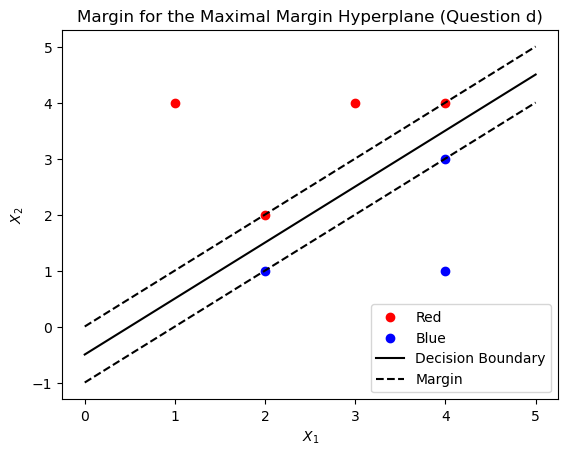

In [50]:

margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
yy_down = yy - np.sqrt(1 + slope**2) * margin
yy_up = yy + np.sqrt(1 + slope**2) * margin


plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Red')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Blue')
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title("Margin for the Maximal Margin Hyperplane (Question d)")
plt.legend()
plt.show()


# e) Indicate the support vectors

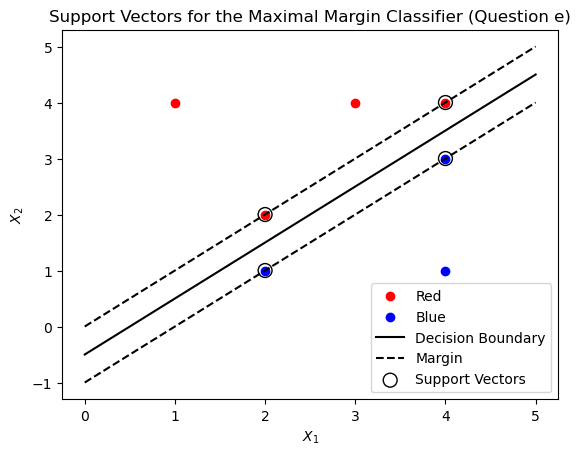

In [52]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Red')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Blue')
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title("Support Vectors for the Maximal Margin Classifier (Question e)")
plt.legend()
plt.show()

# f) Effect of Slight Movement of the Seventh Observation 
Moving the seventh observation slightly would not change the maximal margin hyperplane because it's not a support vector. Only changes in the support vectors' positions would affect the hyperplane

# g) Sketch a Hyperplane That Is Not the Optimal Separating Hyperplane

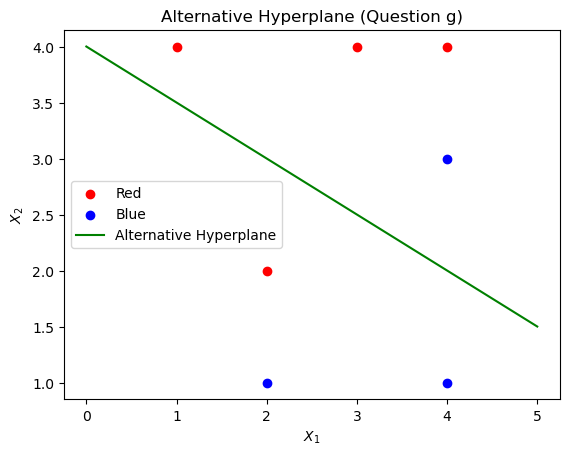

In [55]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Red')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Blue')

slope_alt = -0.5  
intercept_alt = 4  
yy_alt = slope_alt * xx + intercept_alt

plt.plot(xx, yy_alt, 'g-', label='Alternative Hyperplane')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title("Alternative Hyperplane (Question g)")
plt.legend()
plt.show()

# h) Draw an Additional Observation to Make Classes Non-Separable

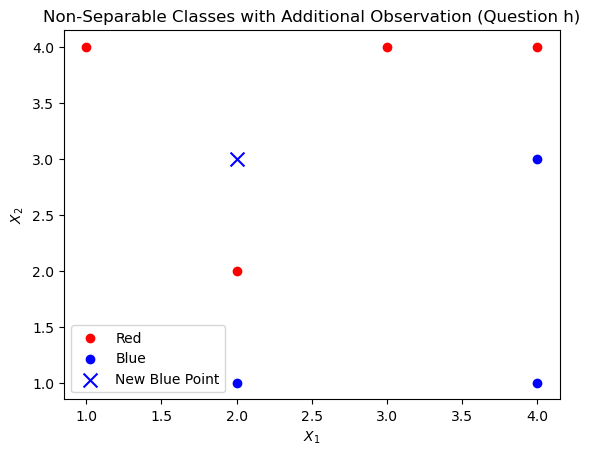

In [59]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Red')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Blue')

new_point = np.array([[2, 3]])
plt.scatter(new_point[:, 0], new_point[:, 1], color='blue', marker='x', s=100, label='New Blue Point')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title("Non-Separable Classes with Additional Observation (Question h)")
plt.legend()
plt.show()